# Comparison: Matterhorn and Salvus

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pprint import pprint

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import xarray as xr

In [5]:
%matplotlib inline

## Conversion dictionaries

In [6]:
clip_time_dict = {
    'sxx': 5e+3,
    'vx': 5e-4,
    'vz': 5e-4,
}

In [7]:
clip_dft_dict = {
    'sxx': 1e+6,
}

In [8]:
rho0 = 2000.0

In [9]:
coeff = {
    'sxx': 1.0,
    'vx': -1.0 / rho0,
    'vz': 1.0/ rho0,
}

## Load cervino output files for gathers and time slices

In [71]:
dsm = xr.load_dataset(f"../cervino/output_mh_time/job_0000/output_0000.h5", engine="h5netcdf")

In [72]:
dss = xr.load_dataset(f"../cervino/output_salvus_time/job_0000/output_0000.h5", engine="h5netcdf")

In [73]:
dsm.data_vars

Data variables:
    gather_0000      (fields_gather, time_gather, traces) float32 0.0 ... 0.0
    slice_time_0000  (fields_time_slice, time_slice, x, z) float32 0.0 ... 0.0

In [74]:
dss.data_vars

Data variables:
    gather_0000      (fields_gather, time_gather, traces) float32 0.0 ... 0.0
    slice_time_0000  (fields_time_slice, time_slice, x, z) float32 0.0 ... 0.0

## Gathers

In [75]:
fields_valid = {field: i for i, field in enumerate(dsm.coords['fields_gather'].values)}
pprint(fields_valid)

{'sxx': 0, 'vx': 1, 'vz': 2}


In [76]:
dam = dsm['gather_0000']
das = dss['gather_0000']

In [77]:
field_string = 'vx'
field = fields_valid[field_string]
c = coeff[field_string]

In [78]:
clip = clip_time_dict[field_string]
vmin, vmax = -clip, clip

In [79]:
_ = dam[field, :, :].plot(aspect="auto", figsize=(12, 5), yincrease=False, cmap=plt.cm.seismic, vmin=vmin, vmax=vmax)

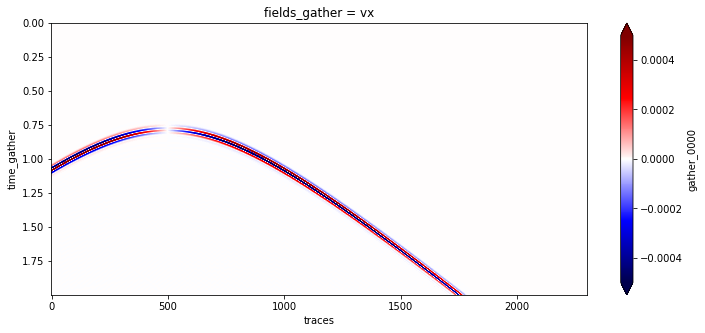

In [80]:
_ = (c * das[field, :, :]).plot(aspect="auto", figsize=(12, 5), yincrease=False, cmap=plt.cm.seismic, vmin=vmin, vmax=vmax)

In [81]:
t = dsm['time_gather']
recx = dsm['recx']

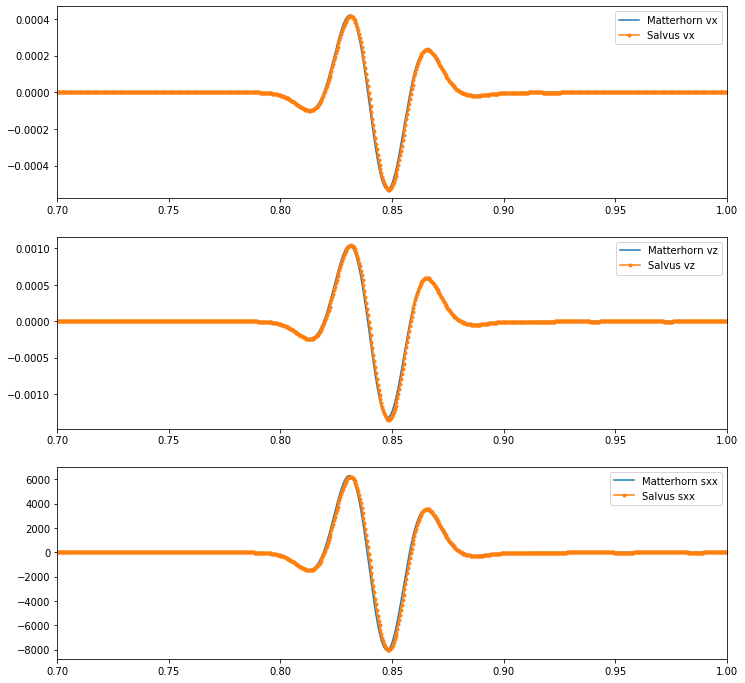

In [83]:
ir = 700
# print(f"The receiver is at x: {recx[ir].values}")

# Figure
f, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 12), squeeze=False)

lims = [0.7, 1.0]

field_string = 'vx'
field = fields_valid[field_string]
c = coeff[field_string]

# Matterhorn
_ = ax[0, 0].plot(t, dam[field, :, ir], label=f"Matterhorn {field_string}")
_ = ax[0, 0].legend()
_ = ax[0, 0].set_xlim(lims)

# Salvus
_ = ax[0, 0].plot(t, c * das[field, :, ir], label=f"Salvus {field_string}", marker='.')
_ = ax[0, 0].legend()
_ = ax[0, 0].set_xlim(lims)

field_string = 'vz'
field = fields_valid[field_string]
c = coeff[field_string]

# Matterhorn
_ = ax[1, 0].plot(t, dam[field, :, ir], label=f"Matterhorn {field_string}")
_ = ax[1, 0].legend()
_ = ax[1, 0].set_xlim(lims)

# Salvus
_ = ax[1, 0].plot(t, c * das[field, :, ir], label=f"Salvus {field_string}", marker='.')
_ = ax[1, 0].legend()
_ = ax[1, 0].set_xlim(lims)

field_string = 'sxx'
field = fields_valid[field_string]
c = coeff[field_string]

# Matterhorn
_ = ax[2, 0].plot(t, dam[field, :, ir], label=f"Matterhorn {field_string}")
_ = ax[2, 0].legend()
_ = ax[2, 0].set_xlim(lims)

# Salvus
_ = ax[2, 0].plot(t, c * das[field, :, ir], label=f"Salvus {field_string}", marker='.')
_ = ax[2, 0].legend()
_ = ax[2, 0].set_xlim(lims)

## Time wavefields

In [84]:
fields_valid = {field: i for i, field in enumerate(dsm.coords['fields_time_slice'].values)}
pprint(fields_valid)

{'vx': 0, 'vz': 1}


In [85]:
dam = dsm['slice_time_0000']
das = dss['slice_time_0000']

In [86]:
it = 4

In [87]:
field_string = 'vx'
field = fields_valid[field_string]
c = coeff[field_string]

In [88]:
clip = clip_time_dict[field_string]
vmin, vmax = -clip, clip

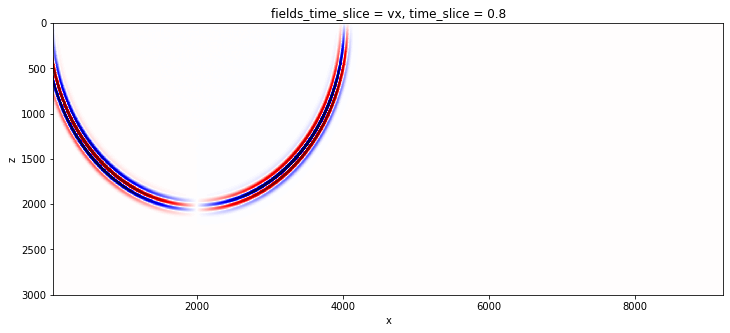

In [89]:
_ = dam[field, it, dam.x>30, :].T.plot(add_colorbar=False, aspect="auto", figsize=(12, 5), yincrease=False, cmap=plt.cm.seismic, vmin=vmin, vmax=vmax)

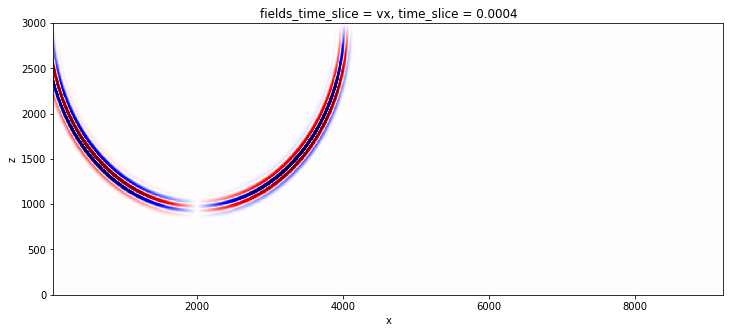

In [90]:
_ = (c * das[field, it, dam.x>30, :]).T.plot(add_colorbar=False, aspect="auto", figsize=(12, 5), yincrease=True, cmap=plt.cm.seismic, vmin=vmin, vmax=vmax)

In [91]:
x = dsm['x']
z = dsm['z']

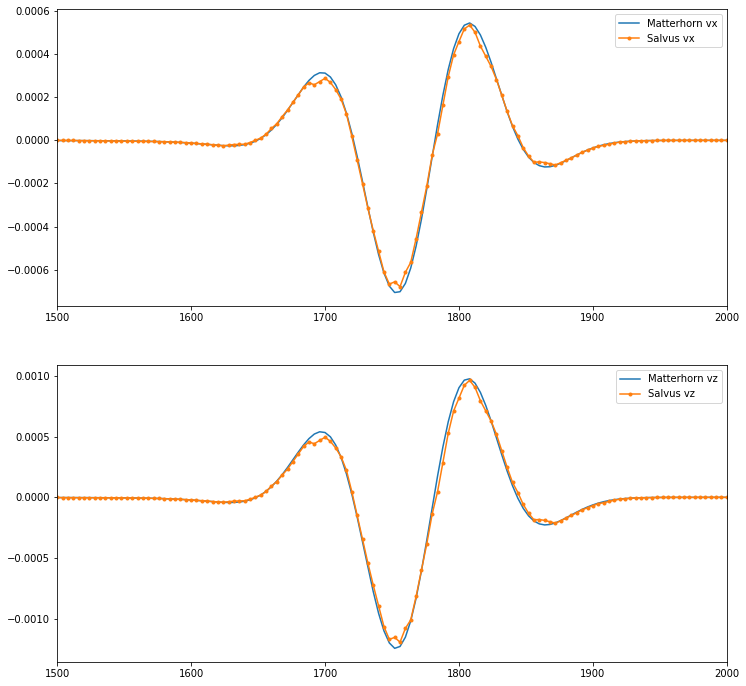

In [92]:
it = 4
ix = 750

# Figure
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 12), squeeze=False)

lims = [1500, 2000]

field_string = 'vx'
field = fields_valid[field_string]
c = coeff[field_string]

# Matterhorn
_ = ax[0, 0].plot(z, dam[field, it, ix, :], label=f"Matterhorn {field_string}")
_ = ax[0, 0].legend()
_ = ax[0, 0].set_xlim(lims)

# Salvus
_ = ax[0, 0].plot(z, c * das[field, it, ix, ::-1], label=f"Salvus {field_string}", marker='.')
_ = ax[0, 0].legend()
_ = ax[0, 0].set_xlim(lims)

field_string = 'vz'
field = fields_valid[field_string]
c = coeff[field_string]

# Matterhorn
_ = ax[1, 0].plot(z, dam[field, it, ix, :], label=f"Matterhorn {field_string}")
_ = ax[1, 0].legend()
_ = ax[1, 0].set_xlim(lims)

# Salvus
_ = ax[1, 0].plot(z, c * das[field, it, ix, ::-1], label=f"Salvus {field_string}", marker='.')
_ = ax[1, 0].legend()
_ = ax[1, 0].set_xlim(lims)

## Load cervino output files for DFT slices

In [93]:
slice_type = 'dft'

In [94]:
dsm = xr.load_dataset(f"../cervino/output_mh_{slice_type}_no_gf/job_0000/output_0000.h5", engine="h5netcdf")

In [95]:
dss = xr.load_dataset(f"../cervino/output_salvus_{slice_type}_no_gf/job_0000/output_0000.h5", engine="h5netcdf")

In [96]:
dsm.data_vars

Data variables:
    gather_0000     (fields_gather, time_gather, traces) float32 0.0 0.0 ... 0.0
    slice_dft_0000  (fields_dft_slice, freq_dft, z, x) complex64 (35.46179-17.028852j) ... 0j

In [97]:
dss.data_vars

Data variables:
    gather_0000     (fields_gather, time_gather, traces) float32 0.0 0.0 ... 0.0
    slice_dft_0000  (fields_dft_slice, freq_dft, x, z) complex64 (-6681.3853-1801.5858j) ... 0j

## DFT wavefields

In [98]:
fields_valid = {field: i for i, field in enumerate(dsm.coords['fields_dft_slice'].values)}
pprint(fields_valid)

{'sxx': 0}


In [99]:
dam = dsm['slice_dft_0000']
das = dss['slice_dft_0000']

In [100]:
print(dam.shape)
print(das.shape)

(1, 8, 751, 2301)
(1, 8, 2301, 751)


In [101]:
ifreq = 4

In [102]:
freqs = dam['freq_dft'].values

In [103]:
omega = (2.0 * np.pi * freqs[ifreq])
print(omega)

157.07963267948966


In [104]:
field_string = 'sxx'
field = fields_valid[field_string]
c = coeff[field_string]

In [105]:
clip = clip_dft_dict[field_string]
vmin, vmax = -clip, clip

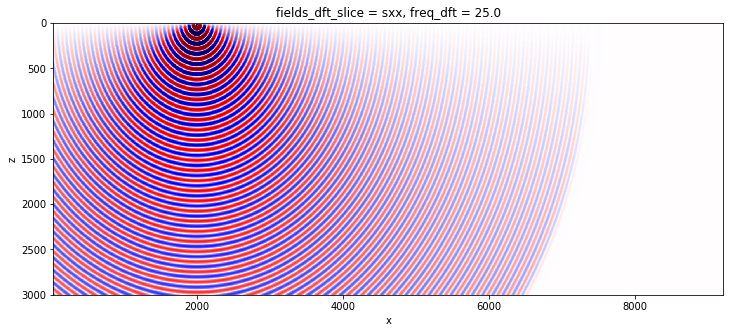

In [106]:
_ = dam[field, ifreq, :, dam.x>30].real.plot(add_colorbar=False, aspect="auto", figsize=(12, 5), yincrease=False, cmap=plt.cm.seismic, vmin=vmin, vmax=vmax)

In [107]:
_ = das[field, ifreq, dam.x>30, :].real.T.plot(add_colorbar=False, aspect="auto", figsize=(12, 5), yincrease=True, cmap=plt.cm.seismic, vmin=vmin, vmax=vmax)

In [108]:
_ = dam[field, ifreq, :, dam.x>30].imag.plot(add_colorbar=False, aspect="auto", figsize=(12, 5), yincrease=False, cmap=plt.cm.seismic, vmin=vmin, vmax=vmax)

In [109]:
_ = das[field, ifreq, dam.x>30, :].imag.T.plot(add_colorbar=False, aspect="auto", figsize=(12, 5), yincrease=True, cmap=plt.cm.seismic, vmin=vmin, vmax=vmax)

In [110]:
x = dsm['x']
z = dsm['z']

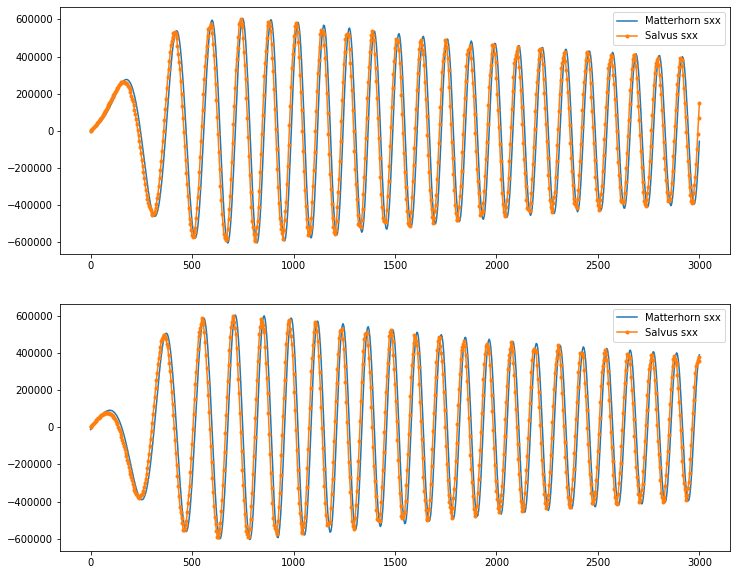

In [111]:
ix = 650

# Figure
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), squeeze=False)

lims = [1000, 2500]

field_string = 'sxx'
field = fields_valid[field_string]
c = coeff[field_string]

# Matterhorn
_ = ax[0, 0].plot(z, dam[field, ifreq, :, ix].real, label=f"Matterhorn {field_string}")
_ = ax[0, 0].legend()
# _ = ax[0, 0].set_xlim(lims)

# Salvus
_ = ax[0, 0].plot(z, das[field, ifreq, ix, ::-1].real, label=f"Salvus {field_string}", marker='.')
_ = ax[0, 0].legend()
# _ = ax[0, 0].set_xlim(lims)

# Matterhorn
_ = ax[1, 0].plot(z, dam[field, ifreq, :, ix].imag, label=f"Matterhorn {field_string}")
_ = ax[1, 0].legend()
# _ = ax[0, 0].set_xlim(lims)

# Salvus
_ = ax[1, 0].plot(z, das[field, ifreq, ix, ::-1].imag, label=f"Salvus {field_string}", marker='.')
_ = ax[1, 0].legend()
# _ = ax[0, 0].set_xlim(lims)